In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.num_epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            self.errors.append(error)
    
    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

In [5]:
def plot_errors(errors):
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of misclassifications')
    plt.title('Perceptron Convergence')
    plt.show()

In [6]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_accuracy = np.mean(model.predict(X_train) == y_train)
    test_accuracy = np.mean(model.predict(X_test) == y_test)
    return train_accuracy, test_accuracy

Perceptron training without normalization:
Training Accuracy: 0.34
Testing Accuracy: 0.30


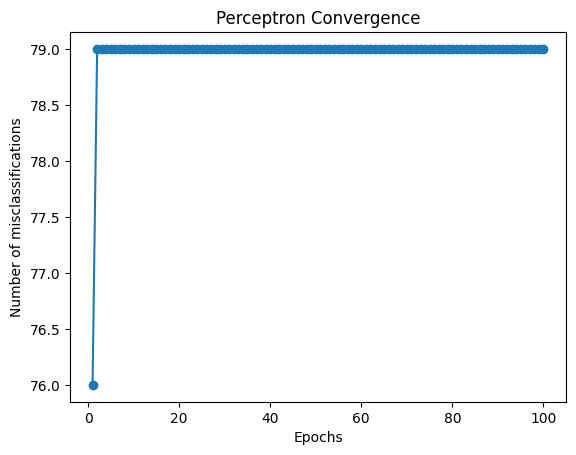

In [7]:
print("Perceptron training without normalization:")
perceptron = Perceptron()
train_acc, test_acc = evaluate_model(perceptron, X_train, y_train, X_test, y_test)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
plot_errors(perceptron.errors)


Perceptron training with standardization (feature scaling):
Training Accuracy: 0.67
Testing Accuracy: 0.63


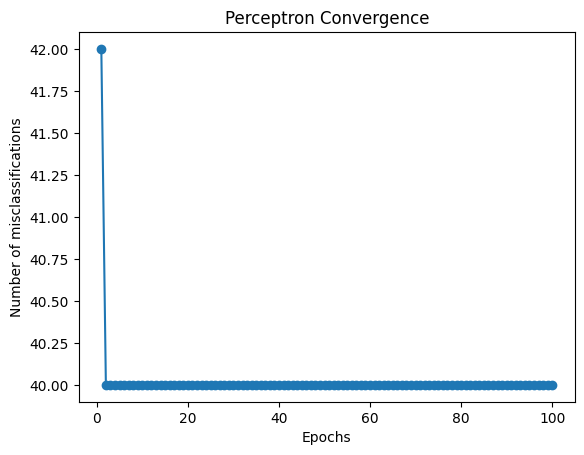

In [8]:
print("\nPerceptron training with standardization (feature scaling):")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
perceptron = Perceptron()
train_acc, test_acc = evaluate_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
plot_errors(perceptron.errors)


Perceptron training with min-max normalization:
Training Accuracy: 0.36
Testing Accuracy: 0.30


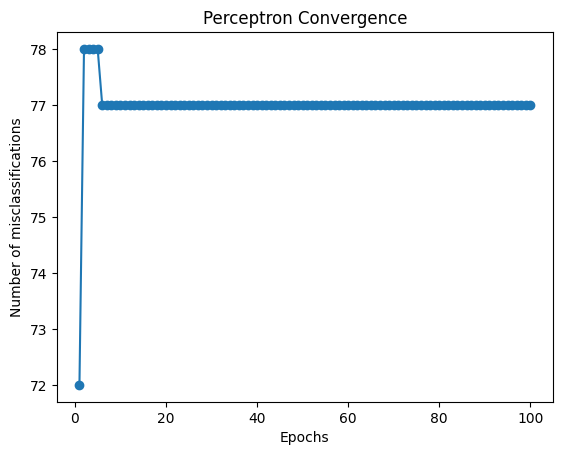

In [9]:
print("\nPerceptron training with min-max normalization:")
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
perceptron = Perceptron()
train_acc, test_acc = evaluate_model(perceptron, X_train_normalized, y_train, X_test_normalized, y_test)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
plot_errors(perceptron.errors)